## <center> Importing the libraries</center>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


BUSINESS PROBLEM:

A new fast food chain is seeing rapid expansion over the past couple of years. They are now trying to optimize their supply chain to ensure that there are no shortages of ingredients.For this, they’ve tasked their data science team to come up with a model that could predict the output of each food processing farm over the next few years. These predictions could further increase the efficiency of their current supply chain management systems.

MACHINE LEARNING PROBLEM:

                          USE A REGRESSION MODEL TO PREDICT THE PROPERTY VALUE 

`##<center>Train data </center>

 <table cellspacing="0" border="0">
	<tr>
		<td height="17" align="left">date</td>
		<td align="left">The Timestamp at which the yield of food processiong farm was measered</td>
	</tr>
	<tr>
		<td height="17" align="left">farm_id</td>
		<td align="left">The farm identifier that recognizes the farm food processing plant </td>
	</tr>
	<tr>
		<td height="17" align="left">ingredient_type:</td>
		<td align="left">#The yield of the plant  in tonnes  </td>
	</tr>
	<tr>
		<td height="17" align="left">yield</td>
		<td align="left">Annual income of the customer</td>
	</tr>
	<tr>
	
</table>

`##<center>Farm data </center>

 <table cellspacing="0" border="0">
	<tr>
		<td height="17" align="left">farm_id</td>
		<td align="left">The farm identifier that recognizes the farm food processing plant </td>
	</tr>
	<tr>
		<td height="17" align="left">founding_year</td>
		<td align="left">They year when the operations commenced on the farm and ood processing plant </td>
	</tr>
	<tr>
		<td height="17" align="left">num_processing_plants:</td>
		<td align="left">The  number of  processing plants  present on the farm</td>
	</tr>
	<tr>
		<td height="17" align="left">farm_area</td>
		<td align="left">The area  of the   farm    in   square meters </td>
	</tr>
	<tr> 
        <td height="17" align="left">farming_company:</td>
		<td align="left">The company that  owns  the  farms </td>
	</tr>
	<tr>
        <td height="17" align="left">deidentified_location:</td>
		<td align="left">The location at  which  the  farm is  present</td>
    </tr>
	<tr>   
</table>

`##<center>Train Weather </center>

<table cellspacing="0" border="0">
	<tr>
		<td height="17" align="left">Date</td>
		<td align="left">The Date at which the yield of food processiong farm was measered </td>
	</tr>
	<tr>
		<td height="17" align="left">Deidentified_location</td>
		<td align="left">The location at wich the farm is present </td>
	</tr>
	<tr>
		<td height="17" align="left">temp_obs</td>
		<td align="left">Temperature Observations</td>
	</tr>
	<tr>
		<td height="17" align="left">cloudiness</td>
		<td align="left">The cloudiness</td>
	</tr>
	<tr> 
        <td height="17" align="left">wind_direction:</td>
		<td align="left">The direction of wind </td>
	</tr>
	<tr>
        <td height="17" align="left">dew_temp:</td>
		<td align="left">the temperature to which air must be cooled, at a given pressure and water-vapor content, for it to reach saturation</td>
    </tr>
	<tr>   
        <td height="17" align="left">pressure_sea_level:</td>
		<td align="left">The altimeter setting in aviation is an atmospheric pressure adjustment</td>
	</tr>
    </tr>
        <td height="17" align="left">precipitation:</td>
		<td align="left">All precipitation develops in clouds, and clouds are formed when water vapor in the atmosphere cools and condenses</td>
    </tr>
    <tr>
         <td height="17" align="left">wind_speed:</td>
		 <td align="left">The speed of the wind</td>
    </tr>
    <tr>    

In [0]:
#reading the related libraries
import pandas as pd
import numpy as np

# Reading the farmdata,traindata,weather data,test data,test weather data##

In [0]:

farm_data = pd.read_csv("/content/drive/My Drive/farm_data.csv")
train_data = pd.read_csv("/content/drive/My Drive/train_data.csv")
weather_data = pd.read_csv("/content/drive/My Drive/train_weather.csv")

In [0]:
test_data = pd.read_csv("/content/drive/My Drive/test_data .csv")

In [0]:
test_weather = pd.read_csv("/content/drive/My Drive/test_weather.csv")

## <center> Dropping the duplicates in farm data</center>

In [10]:
farm_data.drop([1076,537,510,634,705,574,360,678,1300,178,822,679,287,325,395],axis=0,inplace=True)
farm_data.reset_index(drop=True)

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369
...,...,...,...,...,...,...
1429,fid_41664,1914.0,NaN,1822.663957,Sanderson Farms,location 5150
1430,fid_14529,NaN,NaN,399.297094,Obery Farms,location 5150
1431,fid_46454,1997.0,NaN,1046.552295,Sanderson Farms,location 5150
1432,fid_24103,2001.0,NaN,2766.186825,Dole Food Company,location 5150


## <center>Merging the farm data and test data</center>


In [0]:
data3 = pd.merge(farm_data,test_data,how = 'left',on = 'farm_id')

In [0]:
test_weather

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2017-01-01 00:00:00,location 7369,17.8,4.0,100.0,11.7,1021.4,NaN,3.6
1,2017-01-01 01:00:00,location 7369,17.8,2.0,130.0,12.8,1022.0,0.0,3.1
2,2017-01-01 02:00:00,location 7369,16.1,0.0,140.0,12.8,1021.9,0.0,3.1
3,2017-01-01 03:00:00,location 7369,17.2,0.0,140.0,13.3,1022.2,0.0,3.1
4,2017-01-01 04:00:00,location 7369,16.7,2.0,130.0,13.3,1022.3,0.0,2.6
...,...,...,...,...,...,...,...,...,...
138820,2017-12-31 19:00:00,location 5150,-15.0,NaN,310.0,-18.3,1027.5,-1.0,5.1
138821,2017-12-31 20:00:00,location 5150,-15.0,NaN,310.0,-18.9,1027.6,-1.0,6.2
138822,2017-12-31 21:00:00,location 5150,-15.0,NaN,290.0,-19.4,1028.0,-1.0,6.7
138823,2017-12-31 22:00:00,location 5150,-15.6,NaN,290.0,-19.4,1028.4,NaN,6.7


In [0]:
data3.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,date,ingredient_type,id
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,0
1,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-01-01 01:00:00,ing_w,129
2,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-01-01 02:00:00,ing_w,258
3,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-01-01 03:00:00,ing_w,387
4,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-01-01 04:00:00,ing_w,516


## <center>Renaming the columns names</center>

In [0]:
data3 = data3.rename(columns = {'date':'timestamp'})

In [0]:
test1 = pd.merge(data3,test_weather,how='left',on= ['timestamp','deidentified_location'])

In [0]:
test1.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,timestamp,ingredient_type,id,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-01-01 00:00:00,ing_w,0,17.8,4.0,100.0,11.7,1021.4,NaN,3.6
1,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-01-01 01:00:00,ing_w,129,17.8,2.0,130.0,12.8,1022.0,0.0,3.1
2,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-01-01 02:00:00,ing_w,258,16.1,0.0,140.0,12.8,1021.9,0.0,3.1
3,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-01-01 03:00:00,ing_w,387,17.2,0.0,140.0,13.3,1022.2,0.0,3.1
4,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369,2017-01-01 04:00:00,ing_w,516,16.7,2.0,130.0,13.3,1022.3,0.0,2.6


In [0]:
data_new = pd.merge(train_data,farm_data.rename(columns={'farm_id':'farm_id'}),on='farm_id',how='left')

In [0]:
data_new

,date,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,2016-01-01 00:00:00,fid_110884,ing_w,0.000,2008.0,NaN,690.455096,Obery Farms,location 7369
1,2016-01-01 00:00:00,fid_90053,ing_w,0.000,2004.0,NaN,252.696160,Obery Farms,location 7369
2,2016-01-01 00:00:00,fid_17537,ing_w,0.000,1991.0,NaN,499.446528,Obery Farms,location 7369
3,2016-01-01 00:00:00,fid_110392,ing_w,0.000,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,2016-01-01 00:00:00,fid_62402,ing_w,0.000,1975.0,NaN,10833.140121,Obery Farms,location 7369
...,...,...,...,...,...,...,...,...,...
20216095,2016-12-31 23:00:00,fid_41664,ing_w,8.750,1914.0,NaN,1822.663957,Sanderson Farms,location 5150
20216096,2016-12-31 23:00:00,fid_14529,ing_w,4.825,NaN,NaN,399.297094,Obery Farms,location 5150
20216097,2016-12-31 23:00:00,fid_46454,ing_w,0.000,1997.0,NaN,1046.552295,Sanderson Farms,location 5150
20216098,2016-12-31 23:00:00,fid_24103,ing_w,159.575,2001.0,NaN,2766.186825,Dole Food Company,location 5150


In [0]:
data_new = data_new.rename(columns = {'date':'timestamp'})

In [0]:
Train_final = pd.merge(data_new,weather_data,how = 'left')

In [0]:
# checking the percentage of null values in the columns

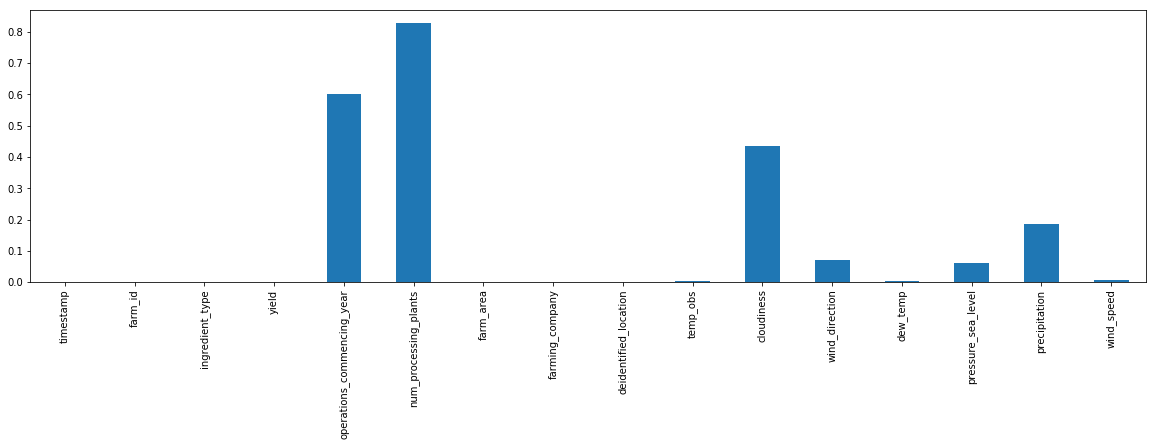

In [0]:
# checking the percentage of null values in the columns
((Train_final.isnull().sum())/Train_final.shape[0]).plot(kind = 'bar',figsize=(20,5))

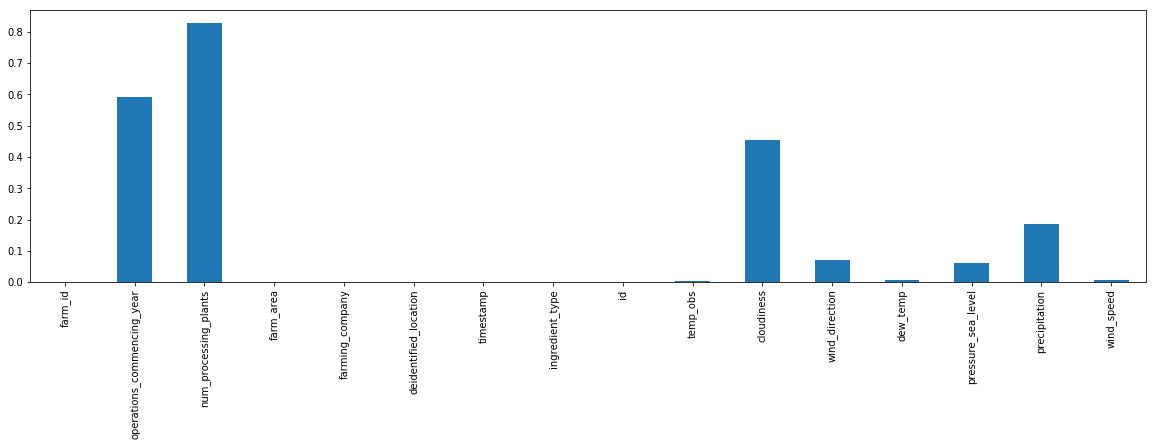

In [0]:
#checking the percentage of null values in the columns
((test1.isnull().sum())/test1.shape[0]).plot(kind = 'bar',figsize=(20,5))

In [0]:
new_data2.isnull().sum()

timestamp                            0
farm_id                              0
ingredient_type                      0
yield                                0
operations_commencing_year    12171967
num_processing_plants         16726426
farm_area                            0
farming_company                      0
deidentified_location                0
temp_obs                         97260
cloudiness                     8827339
wind_direction                 1454866
dew_temp                        100747
pressure_sea_level             1216127
precipitation                  3755342
wind_speed                      144523
dtype: int64

In [0]:
test1.isnull().sum()

farm_id                              0
operations_commencing_year    12342840
num_processing_plants         17239680
farm_area                            0
farming_company                      0
deidentified_location                0
timestamp                            0
ingredient_type                      0
id                                   0
temp_obs                        107840
cloudiness                     9465324
wind_direction                 1468993
dew_temp                        138227
pressure_sea_level             1277044
precipitation                  3866790
wind_speed                      153378
dtype: int64

In [0]:
# import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
## <center>Imputing the Null Values</center>

In [0]:
Train_final['cloudiness'] =Train_final['cloudiness'].interpolate(method ='linear', limit_direction ='both')
Train_final['wind_direction'] =Train_final['wind_direction'].interpolate(method ='linear', limit_direction ='both')
Train_final['dew_temp'] =Train_final['dew_temp'].interpolate(method ='linear', limit_direction ='both')
Train_final['precipitation'] =Train_final['precipitation'].interpolate(method ='linear', limit_direction ='both')
Train_final['pressure_sea_level'] =Train_final['pressure_sea_level'].interpolate(method = 'linear',limit_direction = 'both')
Train_final['wind_speed'] =Train_final['wind_speed'].interpolate(method = 'linear', limit_direction = 'both')
Train_final['temp_obs'] =Train_final['temp_obs'].interpolate(method = 'linear', limit_direction = 'both')

In [0]:
test1['cloudiness'] =test1['cloudiness'].interpolate(method ='linear', limit_direction ='both')
test1['wind_direction'] =test1['wind_direction'].interpolate(method ='linear', limit_direction ='both')
test1['dew_temp'] =test1['dew_temp'].interpolate(method ='linear', limit_direction ='both')
test1['precipitation'] =test1['precipitation'].interpolate(method ='linear', limit_direction ='both')
test1['pressure_sea_level'] =test1['pressure_sea_level'].interpolate(method = 'linear',limit_direction = 'both')
test1['wind_speed'] =test1['wind_speed'].interpolate(method = 'linear', limit_direction = 'both')
test1['temp_obs'] =test1['temp_obs'].interpolate(method = 'linear', limit_direction = 'both')

In [0]:
Train_final.columns

Index(['timestamp', 'farm_id', 'ingredient_type', 'yield',
       'operations_commencing_year', 'num_processing_plants', 'farm_area',
       'farming_company', 'deidentified_location', 'temp_obs', 'cloudiness',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed'],
      dtype='object')

In [0]:
test1.isnull().sum()

farm_id                              0
operations_commencing_year    12342840
num_processing_plants         17239680
farm_area                            0
farming_company                      0
deidentified_location                0
timestamp                            0
ingredient_type                      0
id                                   0
temp_obs                             0
cloudiness                           0
wind_direction                       0
dew_temp                             0
pressure_sea_level                   0
precipitation                        0
wind_speed                           0
dtype: int64

In [0]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(Train_final["yield"]))


Train_final1 = Train_final[(z < 1.96)]

# # Dropping the columns because it has high Null Values##

In [0]:
#dropping the column because it as high null values

Train_final1 =Train_final.drop(["operations_commencing_year"],axis = 1) 

Train_final1 =Train_final1.drop(["num_processing_plants"],axis = 1) 

In [0]:

test1 =test1.drop(["operations_commencing_year"],axis = 1) 

test1 =test1.drop(["num_processing_plants"],axis = 1) 

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

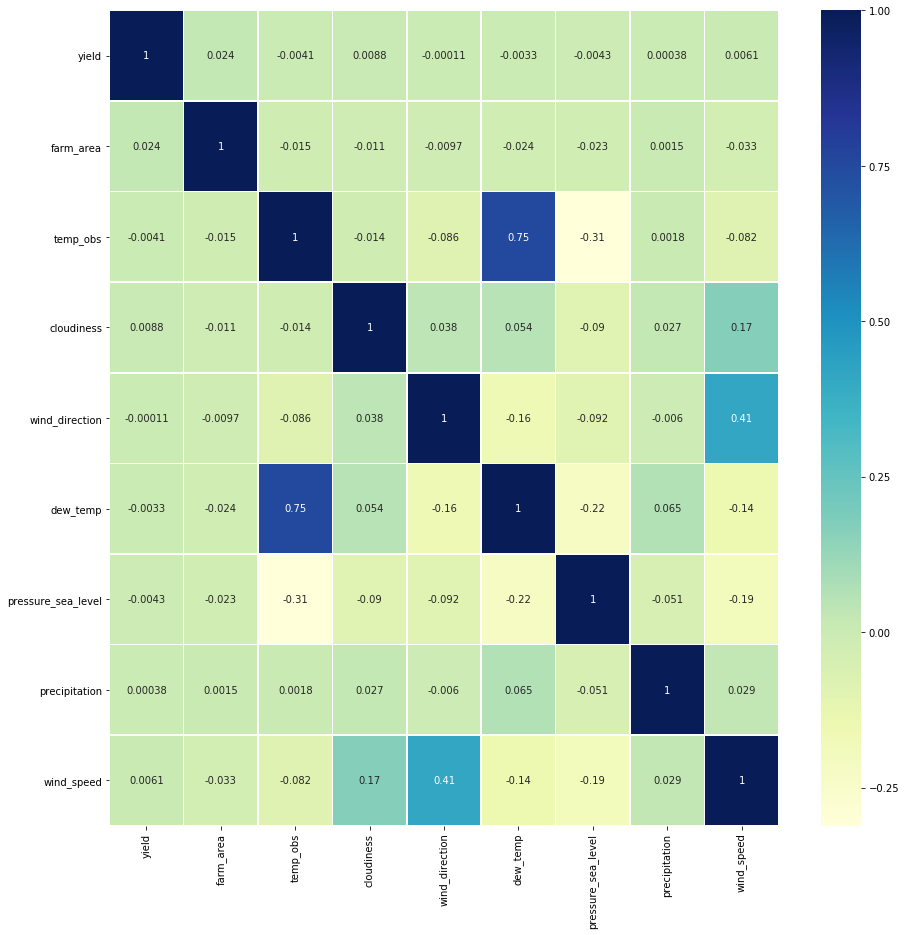

In [0]:
cormat = Train_final1.corr()

f , ax = plt.subplots(figsize=(15,15))
sns.heatmap(cormat,ax=ax,cmap="YlGnBu" ,linewidths=0.5,annot=True)

In [0]:
# <center>Extracting the Features</center>

In [0]:
Train_final1['timestamp'] = Train_final1['timestamp'].astype("datetime64[ns]")

In [0]:
test1['timestamp'] = test1['timestamp'].astype("datetime64[ns]")

In [0]:
Train_final1["day"]=pd.DatetimeIndex(Train_final1["timestamp"]).day
Train_final1["week"]=pd.DatetimeIndex(Train_final1["timestamp"]).week
Train_final1["month"]=pd.DatetimeIndex(Train_final1["timestamp"]).month
Train_final1["hour"]=pd.DatetimeIndex(Train_final1["timestamp"]).hour

In [0]:
test1["day"]=pd.DatetimeIndex(test1["timestamp"]).day
test1["week"]=pd.DatetimeIndex(test1["timestamp"]).week
test1["month"]=pd.DatetimeIndex(test1["timestamp"]).month
test1["hour"]=pd.DatetimeIndex(test1["timestamp"]).hour

In [0]:
Train_final1 =Train_final1.drop(["timestamp"],axis = 1) 

In [0]:
test1 =test1.drop(["timestamp"],axis = 1) 

## <center> Exploratory Data Analysis</center>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

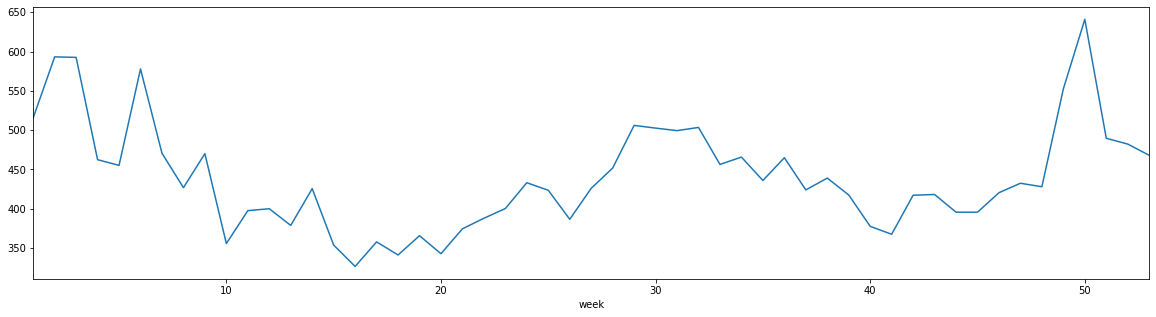

In [0]:
plot1 = Train_final1.groupby("week")["yield"].mean()
plot1.plot(x="week",y="yield",kind="line",figsize=(20,5))

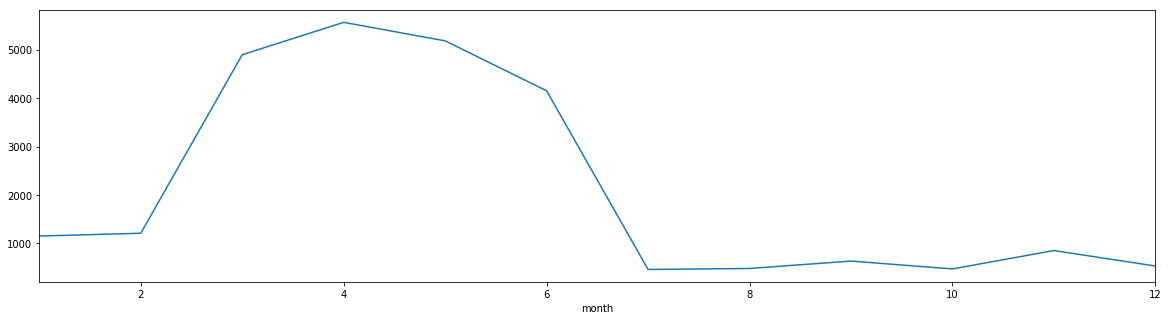

In [0]:
plot2 = Train_final1.groupby("month")["yield"].mean()
plot2.plot(x="month",y="yield",kind="line",figsize=(20,5))

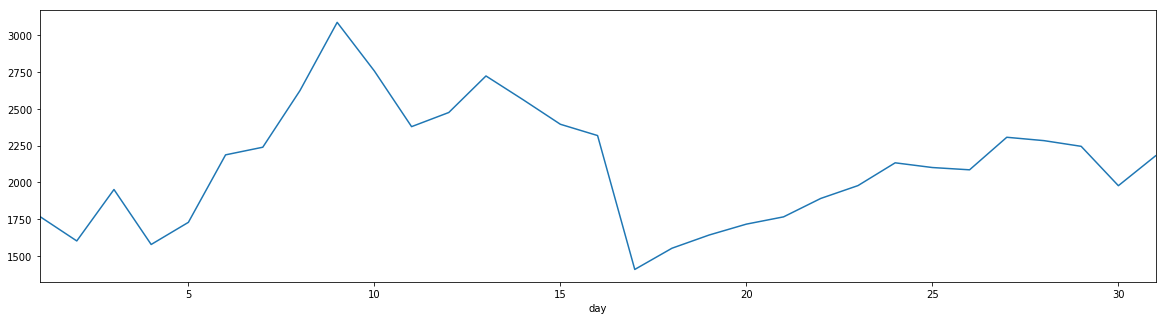

In [0]:
plot3 = Train_final1.groupby("day")["yield"].mean()
plot3.plot(x="day",y="yield",kind="line",figsize=(20,5))

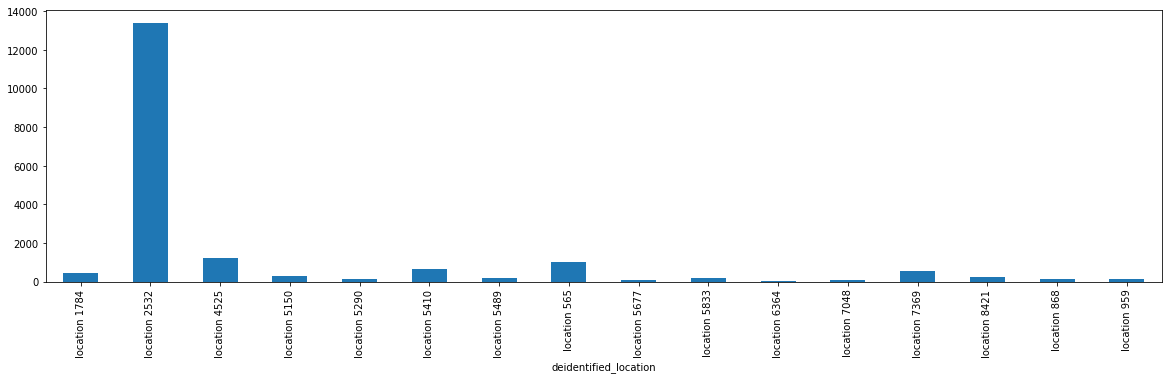

In [0]:
plot4 = Train_final1.groupby("deidentified_location")["yield"].mean()
plot4.plot(x="deidentified_location",y="yield",kind="bar",figsize=(20,5))

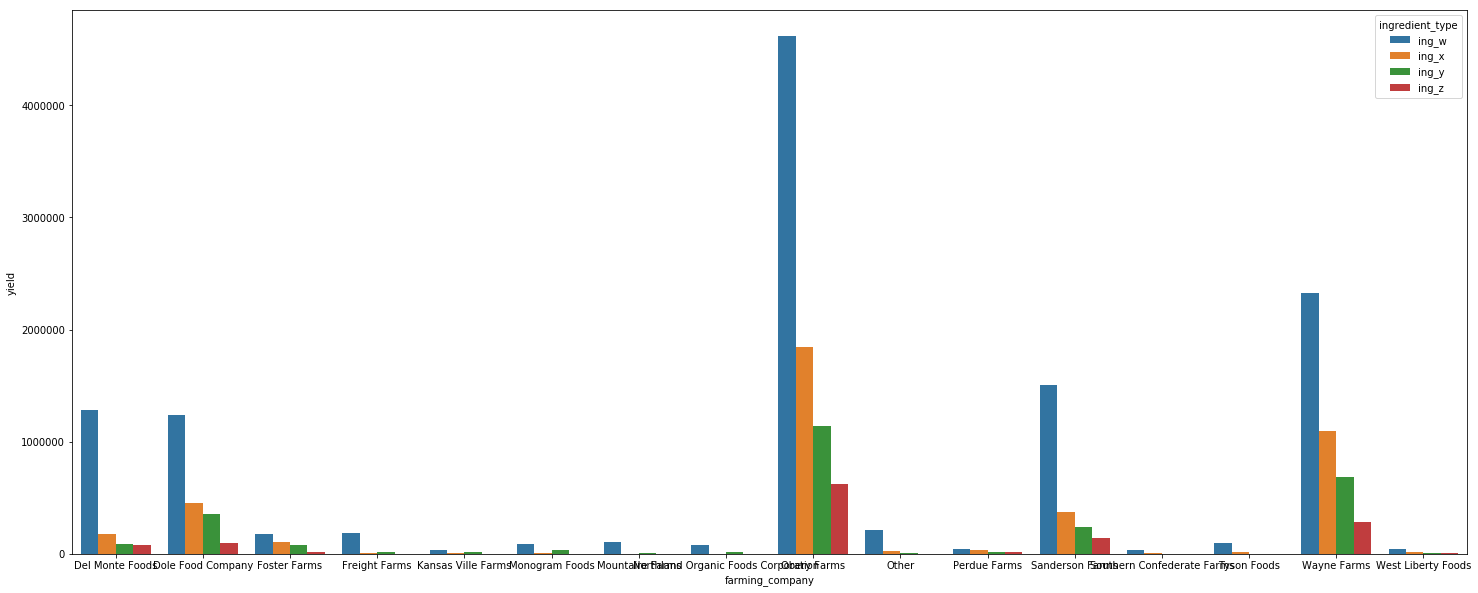

In [0]:
data =pd.DataFrame(Train_final1.groupby(['ingredient_type','farming_company'])['yield'].count())
data=data.reset_index()
plt.figure(figsize = (25,10))
sns.barplot(x='farming_company',y='yield',data=data,hue='ingredient_type')

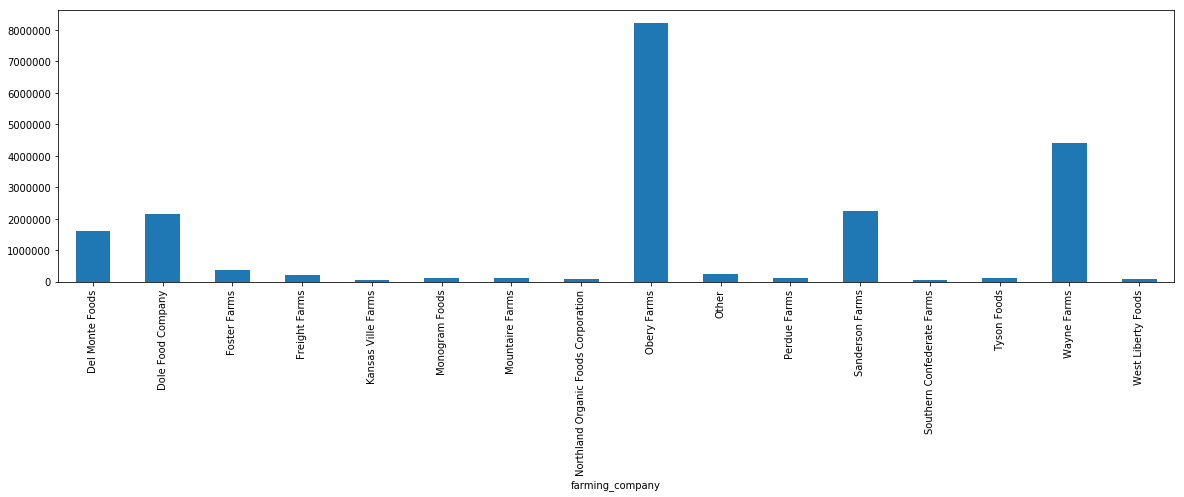

In [0]:
plot3 = Train_final1.groupby("farming_company")["yield"].count()
plot3.plot(x="farming_company",y="yield",kind="bar",figsize=(20,5))

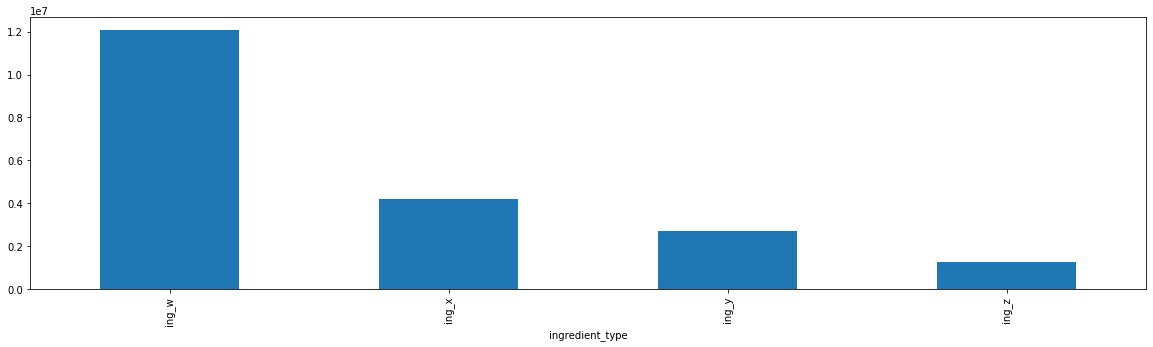

In [0]:
plot4 = Train_final1.groupby("ingredient_type")["yield"].count()
plot4.plot(x="ingredient_type",y="yield",kind="bar",figsize=(20,5))

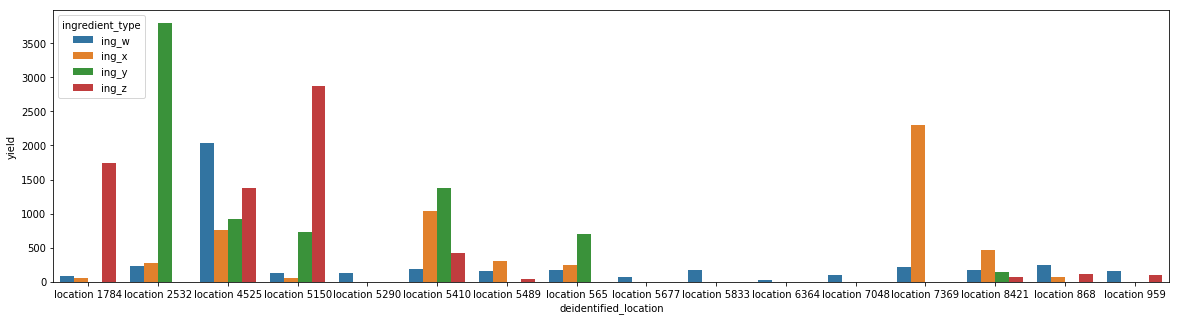

In [0]:
data2 = pd.DataFrame(Train_final1.groupby(['ingredient_type','deidentified_location'])['yield'].mean())
data2=data2.reset_index()
plt.figure(figsize = (20,5))
sns.barplot(x='deidentified_location',y='yield',data=data2,hue='ingredient_type')

## <center>Creating dummies</center>

In [0]:
Train_final1 =  pd.get_dummies(Train_final1, columns=['ingredient_type'])

In [0]:
test1 =  pd.get_dummies(test1, columns=['ingredient_type'])

In [0]:
Train_final1.columns


Index(['farm_id', 'yield', 'farm_area', 'farming_company',
       'deidentified_location', 'temp_obs', 'cloudiness', 'wind_direction',
       'dew_temp', 'pressure_sea_level', 'precipitation', 'wind_speed', 'day',
       'week', 'hour', 'ingredient_type_ing_w', 'ingredient_type_ing_x',
       'ingredient_type_ing_y', 'ingredient_type_ing_z'],
      dtype='object')

In [0]:
test1.columns

Index(['farm_id', 'farm_area', 'farming_company', 'deidentified_location',
       'id', 'temp_obs', 'cloudiness', 'wind_direction', 'dew_temp',
       'pressure_sea_level', 'precipitation', 'wind_speed', 'day', 'week',
       'hour', 'ingredient_type_ing_w', 'ingredient_type_ing_x',
       'ingredient_type_ing_y', 'ingredient_type_ing_z'],
      dtype='object')

In [0]:
Train_final1.dtypes

timestamp                      object
farm_id                        object
ingredient_type                object
yield                         float64
operations_commencing_year    float64
num_processing_plants         float64
farm_area                     float64
farming_company                object
deidentified_location          object
temp_obs                      float64
cloudiness                    float64
wind_direction                float64
dew_temp                      float64
pressure_sea_level            float64
precipitation                 float64
wind_speed                    float64
dtype: object

In [0]:
test1.dtypes

farm_id                   object
farm_area                float64
farming_company           object
deidentified_location     object
ingredient_type           object
id                         int64
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
day                        int64
week                       int64
hour                       int64
dtype: object

In [0]:
## <center>Changing the data types</center>

In [0]:
Train_final1['day']=Train_final1.day.astype('category')
Train_final1['week']=Train_final1.week.astype('category')
Train_final1['farm_id']=Train_final1.farm_id.astype('category')
Train_final1['iingredient_type_ing_w']=Train_final1.ingredient_type_ing_w.astype('category')
Train_final1['ingredient_type_ing_x']=Train_final1.ingredient_type_ing_x.astype('category')
Train_final1['ingredient_type_ing_y']=Train_final1.ingredient_type_ing_y.astype('category')
Train_final1['ingredient_type_ing_z']=Train_final1.ingredient_type_ing_z.astype('category')
Train_final1['farming_company']=Train_final1.farming_company.astype('category')
Train_final1['deidentified_location']=Train_final1.deidentified_location.astype('category')

In [0]:
test1['day']=test1.day.astype('category')
test1['week']=test1.week.astype('category')
test1['farm_id']=test1.farm_id.astype('category')
test1['iingredient_type_ing_w']=test1.ingredient_type_ing_w.astype('category')
test1['ingredient_type_ing_x']=test1.ingredient_type_ing_x.astype('category')
test1['ingredient_type_ing_y']=test1.ingredient_type_ing_y.astype('category')
test1['ingredient_type_ing_z']=test1.ingredient_type_ing_z.astype('category')
test1['farming_company']=test1.farming_company.astype('category')
test1['deidentified_location']=test1.deidentified_location.astype('category')

In [0]:
new_data2.dtypes

farm_id                  category
ingredient_type          category
yield                     float64
farm_area                 float64
farming_company          category
deidentified_location    category
temp_obs                  float64
cloudiness                float64
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
precipitation             float64
wind_speed                float64
day                      category
week                     category
hour                     category
dtype: object

In [0]:
test1.dtypes

farm_id                  category
farm_area                 float64
farming_company          category
deidentified_location    category
ingredient_type          category
id                          int64
temp_obs                  float64
cloudiness                float64
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
precipitation             float64
wind_speed                float64
day                      category
week                     category
hour                     category
dtype: object

## <center> Performing label encoder on categorical variables</center>

In [0]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [0]:
Train_final1['deidentified_location']= label_encoder.fit_transform(Train_final1['deidentified_location'])
Train_final1['farming_company']= label_encoder.fit_transform(Train_final1['farming_company'])


In [0]:
test1['deidentified_location']= label_encoder.fit_transform(test1['deidentified_location'])
test1['farming_company']= label_encoder.fit_transform(test1['farming_company'])


In [0]:
Train_final1['farm_id'] = label_encoder.fit_transform(Train_final1['farm_id'])

In [0]:
test1['farm_id']= label_encoder.fit_transform(test1['farm_id'])

In [0]:
print(new_data3.shape)
print(test1.shape)

(20211985, 20)
(20848800, 20)


In [0]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [0]:
Train_final1.columns

Index(['farm_id', 'yield', 'farm_area', 'farming_company',
       'deidentified_location', 'temp_obs', 'cloudiness', 'wind_direction',
       'dew_temp', 'pressure_sea_level', 'precipitation', 'wind_speed', 'day',
       'week', 'hour', 'ingredient_type_ing_w', 'ingredient_type_ing_x',
       'ingredient_type_ing_y', 'ingredient_type_ing_z',
       'iingredient_type_ing_w'],
      dtype='object')

## <center>Train Test Split</center>

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
#test2 = test1.sample(5000000)
#new_data3 =new_data2.sample(7500000)

In [0]:
y = Train_final1['yield']

In [0]:
x= Train_final1.drop(['yield'],axis = 1)

In [0]:
scalar = StandardScaler()
scalar.fit_transform(x)

array([[-0.03506081, -0.85886283, -0.02830836, ...,  1.73399036,
        -1.66170024,  0.82229378],
       [-0.03633449, -0.89896971, -0.02830836, ...,  1.73399036,
        -1.66170024,  0.82229378],
       [-0.03740756, -0.87636277, -0.02830836, ...,  1.73399036,
        -1.66170024,  0.82229378],
       ...,
       [-0.03760254, -0.82623768,  0.63233973, ...,  1.66747803,
         1.66103062,  0.82229378],
       [-0.03433736, -0.6686871 , -1.56982058, ...,  1.66747803,
         1.66103062,  0.82229378],
       [-0.03760705, -0.13674321,  1.29298783, ...,  1.66747803,
         1.66103062,  0.82229378]])

In [0]:
from sklearn import metrics
def rmse(train_actual,train_prediction,test_actual,test_prediction):
    print('train')
    print('rmse: ',np.sqrt(metrics.mean_squared_error(train_actual, train_prediction)))
    
    print('test')
    print('rmse: ',np.sqrt(metrics.mean_squared_error(test_actual, test_prediction)))

In [0]:
trainx,valx,trainy,valy=train_test_split(x,y,test_size=0.2, random_state=123)

## <center> Lasso Regression</center>

In [0]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [46]:
ls = Lasso()
ls.fit(trainx, trainy)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
pred3 = ls.predict(test1)

In [0]:
pred_train = ls.predict(trainx)
pred_test = ls.predict(valx)

In [50]:
rmse(trainy,pred_train,valy,pred_test)

train
rmse:  152134.14729856476
test
rmse:  156915.8869081057


([23990747434.805298,
  23059047165.74846,
  22910680934.64414,
  22818299406.5834,
  23313413280.200222,
  23415406070.038742,
  23161959883.416348,
  23217302639.61336,
  23248088801.71438,
  23144593577.207027],
 [24622595564.157417,
  24622615772.295467,
  24622613090.020645,
  24622637067.773666,
  24622566104.417404,
  24622550457.922318,
  24622545084.084812,
  24622553772.627487,
  24622569460.63221,
  24622570430.558178])

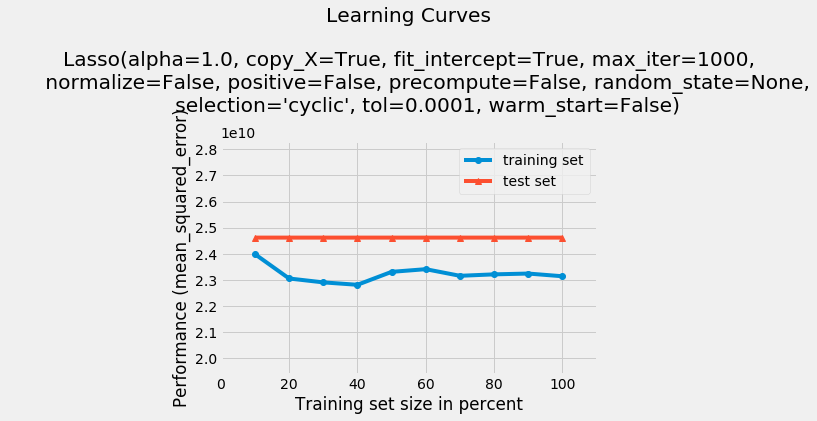

In [51]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(trainx,trainy,valx,valy,ls,scoring = 'mean_squared_error')

In [0]:
pred2 = ls.predict(test1)

In [0]:
sol3 = pd.DataFrame({'id':test_data['id'],'yield':pred2})

In [0]:
sol3.to_csv('sample3.csv',index=False)

## <center>Decision Tree</center>

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [0]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [0]:
from sklearn import tree
dtr = DecisionTreeRegressor(max_depth=20, min_samples_split =100,min_samples_leaf=50, random_state=123)
dtr.fit(trainx,trainy)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=123, splitter='best')

In [0]:
pred_train = dtr.predict(trainx)
pred_test = dtr.predict(valx)

In [0]:
rmse(trainy,pred_train,valy,pred_test)

train
rmse:  891.0454925512194
test
rmse:  896.5991959932009


([2903325000.6359787,
  2910470966.0125284,
  2811313017.2654414,
  2938062905.1680226,
  2749146504.534598,
  2769041067.198929,
  2631747972.998816,
  2291259889.4810376,
  1951413300.798353,
  2168577633.6559525],
 [4155624845.969595,
  3771919004.2557983,
  3714731875.910642,
  3702358604.305428,
  3536134982.596653,
  3364693833.006902,
  3070392905.0508866,
  2578512137.432331,
  2215423033.3487473,
  2653475983.380385])

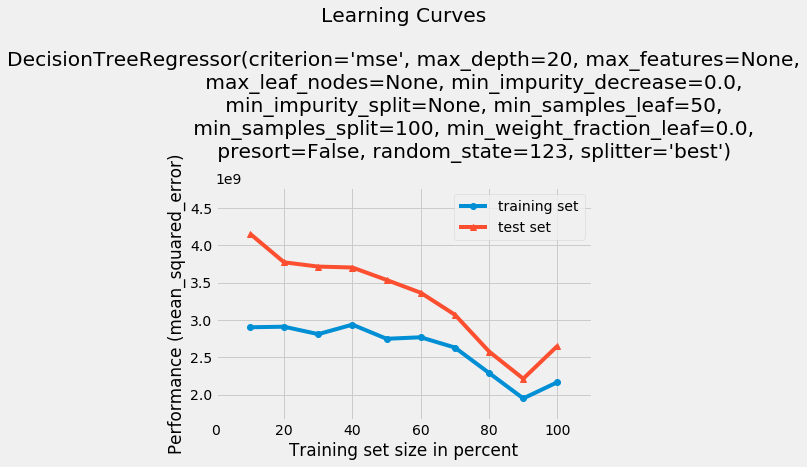

In [0]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(trainx,trainy,valx,valy,dtr,scoring = 'mean_squared_error')

By Decision Tree model i got good predictions rather than lasso and linear regressions


In [0]:
test1 =test1.drop(["id"],axis = 1) 

In [0]:
pred6 = dtr.predict(test1)

In [0]:
sol7 = pd.DataFrame({'id':test_data['id'],'yield':pred6})

In [0]:
sol7.to_csv('sample7.csv',index=False)

In [0]:
pred4 = dtr.predict(test1)

In [0]:
sol4 = pd.DataFrame({'id':test_data['id'],'yield':pred4})

In [0]:
sol4.to_csv('sample4.csv',index=False)

## <center>Linear Regression</center>

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()
lm.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predttrain=lm.predict(trainx)

In [0]:
predicttest=lm.predict(valx)

In [0]:
from sklearn import metrics
def rmse(train_actual,train_prediction,test_actual,test_prediction):
    print('train')
    print('rmse: ',np.sqrt(metrics.mean_squared_error(train_actual, train_prediction)))
    
    print('test')
    print('rmse: ',np.sqrt(metrics.mean_squared_error(test_actual, test_prediction)))
    

In [0]:
rmse(trainy,predttrain,valy,predicttest)

train
rmse:  141691.16519427227
test
rmse:  145862.38027769976


In [0]:
test1 =test1.drop(["id"],axis = 1) 

In [0]:
pred = dtr.predict(test1)

In [0]:
sol3 = pd.DataFrame({'id':test_data['id'],'yield':pred})

In [0]:
#sol1

In [0]:
sol3.to_csv('sample4.csv',index=False)